# Egyszerű módszer 3D-ben mozgó műhold mozgásegyenletének megoldására

In [8]:
# szokásos bevezetés
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Egyszerű mozgásegyenlet-megoldó

In [28]:
# egyszerű, józan eszes léptetés: x és v értékek korrekciója
# feltéve, hogy állandó erő hat dt ideig

def lepes(xn, vn, m, F, dt):
    a = F(xn,vn,m) / m  # gyorsulás Newton II-ből
    v_new = vn + a*dt   # konstanssal közelítjük a gyorsulást
    x_new = xn + v_new*dt  # feltesszük, hogy az új sebességgel mozgott. lehetne máshogy?
    
    return(x_new, v_new) # visszaadjuk az új értékekeket

# Newton szerint így működik a természet, csak dt=0-val számol...

Gravitációs erőtörvény: $$\underline{F}=-\gamma\,\frac{m M}{r^2} \,\frac{\underline{r}}{r}$$
Átírva:
$$\underline{F}=-\gamma M\frac{\underline{r}}{r^3}\cdot m$$
Univerzális állandó:
$$\gamma = 6.67\cdot10^{-11} \,\frac{\mbox{N}\mbox{m}^2}{\mbox{kg}^2}$$

In [33]:
# Fontos állandók

gamma=6.67e-11
M_Föld=5.972e24
R_Föld=6378000.0

nap=60*60*24
év=365.242195*nap


In [34]:
# 3D-s erőfgv:

M=M_Föld  


# erőfüggvény origó-beli vonzócentrummal
def F_grav(r,v,m):
    
    r_abs=(r**2).sum()**0.5
    F_grav=-gamma*M*r/r_abs**3
    
    return(F_grav)

## Teszt, print-ekkel

In [35]:
# bemenő adatok:
r0=np.array([R_Föld+300000.0, 0.0, 0.0], np.float64)     # kezdő hely
v0=np.array([0.0, 9000.0, 0.0], np.float64)     # kezdő sebesség
dt=10.0  # időlépés
m=1.0   # tömeg, de végül is mindegy, ha csak gravitáció hat

# előkészítjük a mozgást...
r=r0; v=v0

# t-től t_max-ig számolunk
t=0.0; t_max=1.0*nap

# indul a mozgás!
while (t<=t_max+1e-6):   # leállás, ha túlléptük a max időt
    #print(("%.4f\t"+"%.4f\t"*6)%(t,r[0], r[1], r[2], v[0], v[1], v[2]))  # egyszerű kiírás
    r, v = lepes(r, v, m, F_grav, dt)  # a Newton II-t ismerő rutin meghívása
    t += dt

Ezt nehéz átlátni!

## Rajzoljunk print() helyett!

Text(0, 0.5, 'v_xyz(t)')

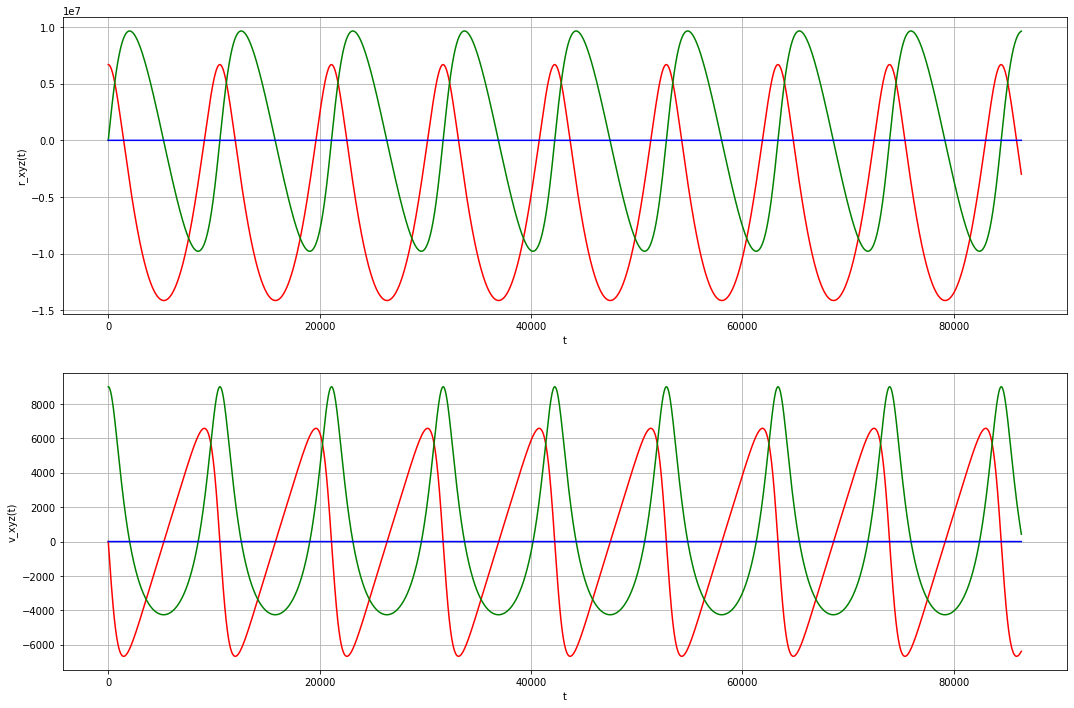

In [36]:
# kezdő értékek
r0=np.array([R_Föld+300000.0, 0.0, 0.0], np.float64)     # kezdő hely
v0=np.array([0.0, 9000.0, 0.0], np.float64)     # kezdő sebesség
dt=10.0  # időlépés
m=1.0   # tömeg, de végül is mindegy, ha csak gravitáció hat


r=r0; v=v0
t=0.0; t_max=1.0*nap

t_list=[]  # listákba pakoljuk az eredményt print helyett
r_list=[]
v_list=[]
# itt fut a szimuláció
while (t<=t_max+1e-6):
    t_list.append(t)
    v_list.append(v)
    r_list.append(r)
    r, v = lepes(r, v, m, F_grav, dt)
    t += dt
    
# tömbbé alakítjuk
r_arr=np.asarray(r_list)
v_arr=np.asarray(v_list)

# most kirajzoljuk
fig=plt.figure(figsize=(18,12))  
ax1=fig.add_subplot(211) # két rész-grafikon
ax2=fig.add_subplot(212)
ax1.plot(t_list, r_arr[:,0], color="red") # az elsőbe az rx(t), vörös
ax1.plot(t_list, r_arr[:,1], color="green") # ...
ax1.plot(t_list, r_arr[:,2], color="blue") # 
ax2.plot(t_list, v_arr[:,0], color="red") # a másodikba a vx(t), vörös
ax2.plot(t_list, v_arr[:,1], color="green") # 
ax2.plot(t_list, v_arr[:,2], color="blue") # 
ax1.grid()
ax2.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("r_xyz(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("v_xyz(t)")

Na, itt már történik valami! 

Text(0, 0.5, 'z')

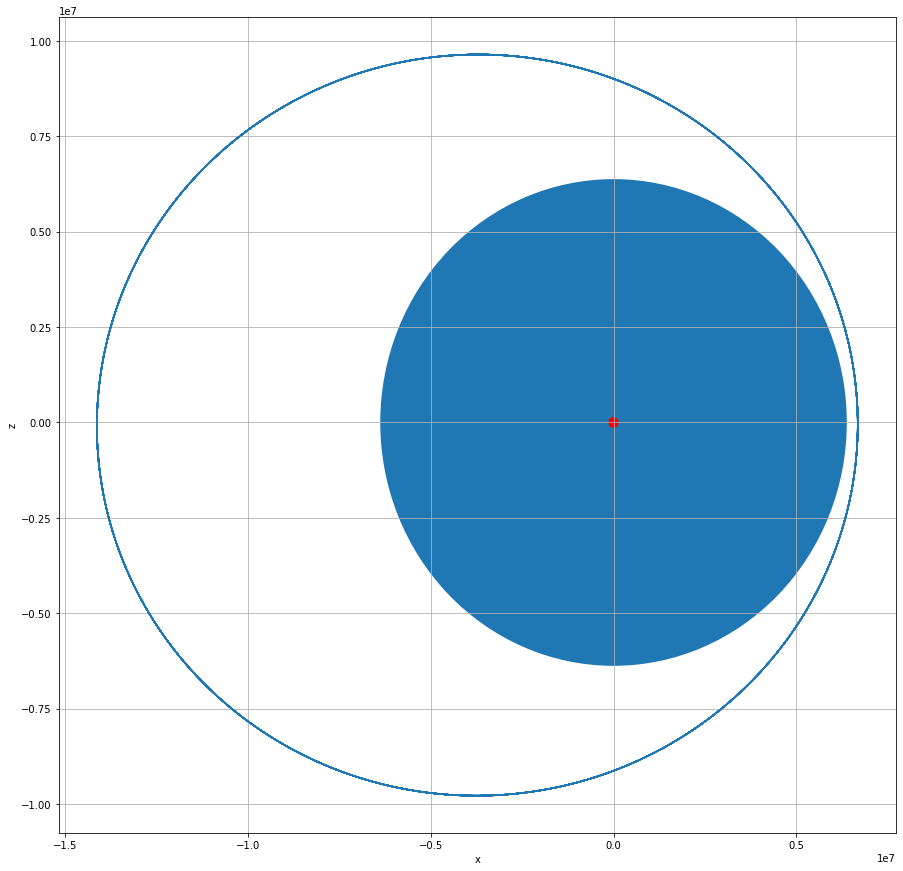

In [37]:
# ábrázoljuk a pályát
r0=np.array([R_Föld+300000.0, 0.0, 0.0], np.float64)     # kezdő hely
v0=np.array([0.0, 9000.0, 0.0], np.float64)     # kezdő sebesség
dt=10.0  # időlépés
m=1.0   # tömeg, de végül is mindegy, ha csak gravitáció hat



r=r0; v=v0
t=0.0; t_max=1.0*nap

t_list=[]  # listákba pakoljuk az eredményt print helyett
r_list=[]
v_list=[]

while (t<=t_max+1e-6):  # 
    t_list.append(t)
    v_list.append(v)
    r_list.append(r)
    r, v = lepes(r, v, m, F_grav, dt)
    t += dt
    
# tömbbé alakítjuk
r_arr=np.asarray(r_list)
v_arr=np.asarray(v_list)

# most kirajzoljuk az eltárolt értékeket
fig=plt.figure(figsize=(15,15))  
ax1=fig.add_subplot(111) # egyetlen grafikon a pályának
ax1.plot(r_arr[:,0], r_arr[:,1]) # itt választjuk meg, melyik két koodinátát jelenítjük meg
circ=plt.Circle((0,0), R_Föld)  # csak az áttekinthetőség kedvéért egy Földet is rajzolunk
kp=plt.Circle((0,0), R_Föld/50.0, color="red")
ax1.add_patch(circ)
ax1.add_patch(kp)
ax1.grid()
ax1.set_xlabel("x")
ax1.set_ylabel("z")

## Becsapódás-vizsgálat

In [60]:
# becsapódik-e a műhold?

h_start=200.0*1000.0  # indítási magasság
v_start=9000.0   # indítási sebesség

r0=np.array([R_Föld+h_start, 0.0, 0.0], np.float64)     # kezdő hely
v0=np.array([0.0, v_start, 0.0], np.float64)     # kezdő sebesség
dt=10 # időlépés
m=1.0   # tömeg, de végül is mindegy, ha csak gravitáció hat

r=r0; v=v0
t=0.0; t_max=20.0*nap

In [61]:

t_list=[]  # listákba pakoljuk az eredményt print helyett
r_list=[]
v_list=[]

becsapodas=False
while (t<=t_max+1e-6):   # r[2]>0: még nem esett le!
    t_list.append(t)
    v_list.append(v)
    r_list.append(r)
    r_abs=(r**2).sum()**0.5
    if r_abs<R_Föld:   # becsapódtunk
        becsapodas=True
        break
              
    r, v = lepes(r, v, m, F_grav, dt)
    t += dt
    
# tömbbé alakítjuk
r_arr=np.asarray(r_list)
v_arr=np.asarray(v_list)


Text(0, 0.5, 'z')

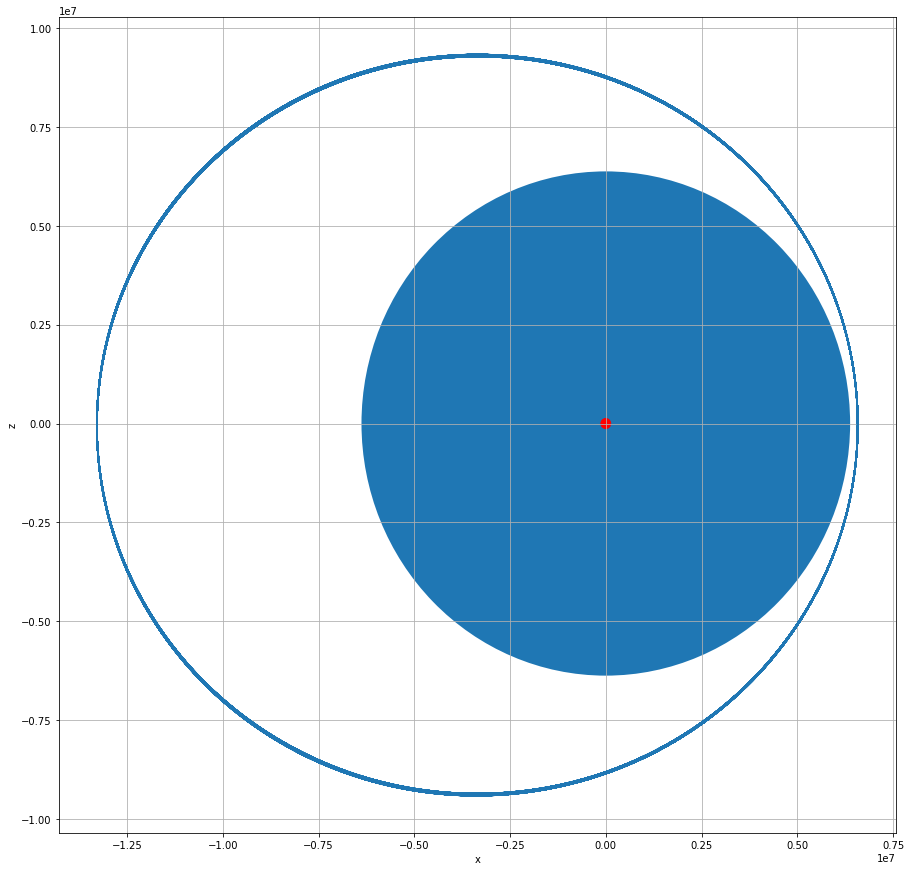

In [62]:
# most kirajzoljuk az eltárolt értékeket
fig=plt.figure(figsize=(15,15))  
ax1=fig.add_subplot(111) # egyetlen grafikon a pályának
ax1.plot(r_arr[:,0], r_arr[:,1]) # itt választjuk meg, melyik két koodinátát jelenítjük meg

circ=plt.Circle((0,0), R_Föld)  # csak az áttekinthetőség kedvéért egy Földet is rajzolunk
kp=plt.Circle((0,0), R_Föld/50.0, color="red")
ax1.add_patch(circ)
ax1.add_patch(kp)
ax1.grid()
ax1.set_xlabel("x")
ax1.set_ylabel("z")

In [63]:
if becsapodas:
    print("A műhold a vizsgált időszakban becsapódott a felszínbe!")
    print("t=%.02f s"%t)
    print("v=%.02f m/s"%((v_arr[-1,:]**2).sum()**0.5))
else:
    print("A műhold a vizsgált időszakban nem csapódott be a felszínbe!")

A műhold a vizsgált időszakban nem csapódott be a felszínbe!


## Hogyan változott az energia?

### Mozgási energiát könnyű számolni

In [19]:
E_m_arr=0.5*m*(v_arr**2).sum(axis=1)   # (v_arr**2).sum(axis=1) = vx**2 + vy**2 + vz**2 -ek tömbje

Text(0, 0.5, 'E_m')

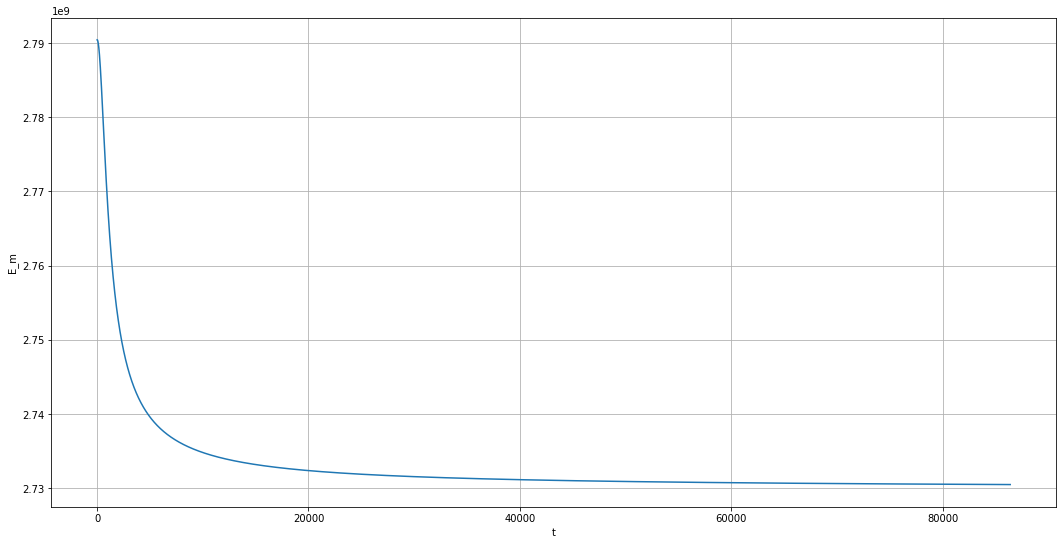

In [20]:
fig=plt.figure(figsize=(18,9))  
ax1=fig.add_subplot(111) # egyetlen grafikon
ax1.plot(t_list, E_m_arr) # 
ax1.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("E_m")

### Potenciális energiához kell egy függvény

In [21]:
V_arr=-gamma*M*m/((r_arr**2).sum(axis=1)**0.5)  # grav erő potenciálja

Text(0, 0.5, 'E')

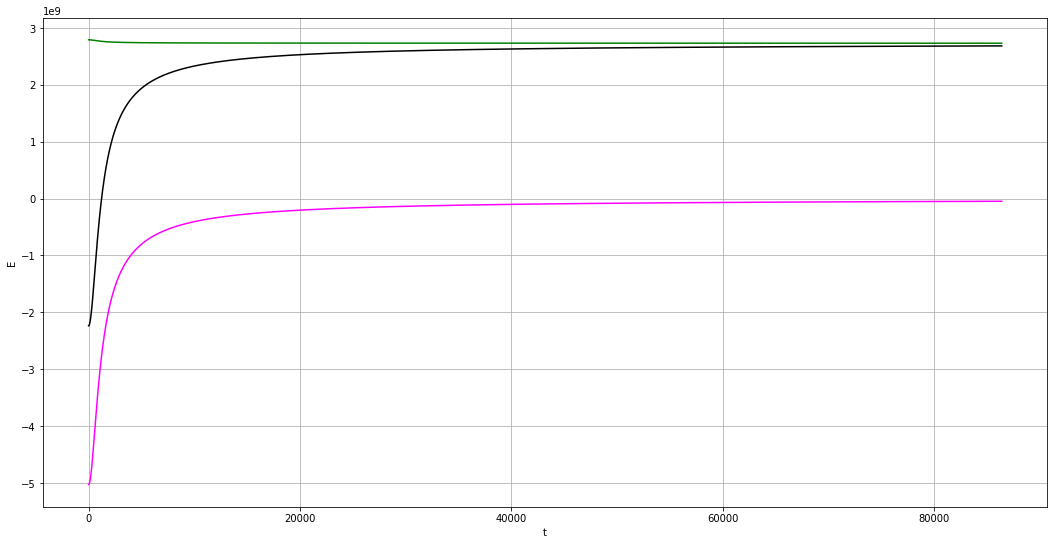

In [22]:
fig=plt.figure(figsize=(18,9))  
ax1=fig.add_subplot(111) # egyetlen grafikon 
ax1.plot(t_list, E_m_arr, color="green") # mozgási energia
ax1.plot(t_list, V_arr, color="magenta") # helyzeti energia
ax1.plot(t_list, E_m_arr+V_arr, color="black") # össz energia
ax1.grid()
ax1.set_xlabel("t")
ax1.set_ylabel("E")

In [17]:
# Mit jelent, hogy negatív a helyzeti eneriga és az össz energia?